In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats

In [118]:
def plot_series(s):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(s.index.tolist(), s.tolist())
    
    # plot curve
    plt.figure(figsize=(20,10))
    plt.plot( s, marker='', color='olive', linewidth=2)
    plt.xlabel('Input size')
    plt.ylabel('Time')
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.title('Scaling')
    
    # plot linear fit
    max_index = max(s.index)
    plt.plot(pd.Series([intercept, max_index * slope + intercept], index=[0, max_index]))
    

In [146]:
def sample_fn(n, growth_fn, sigma_squared):
    indices = []
    values = []
    for i in range(1, n + 1):
        indices.append(i)
        value = growth_fn(i) + sum(np.random.normal(0, sigma_squared, i))
        values.append(value)
    return pd.Series(values, index=indices)

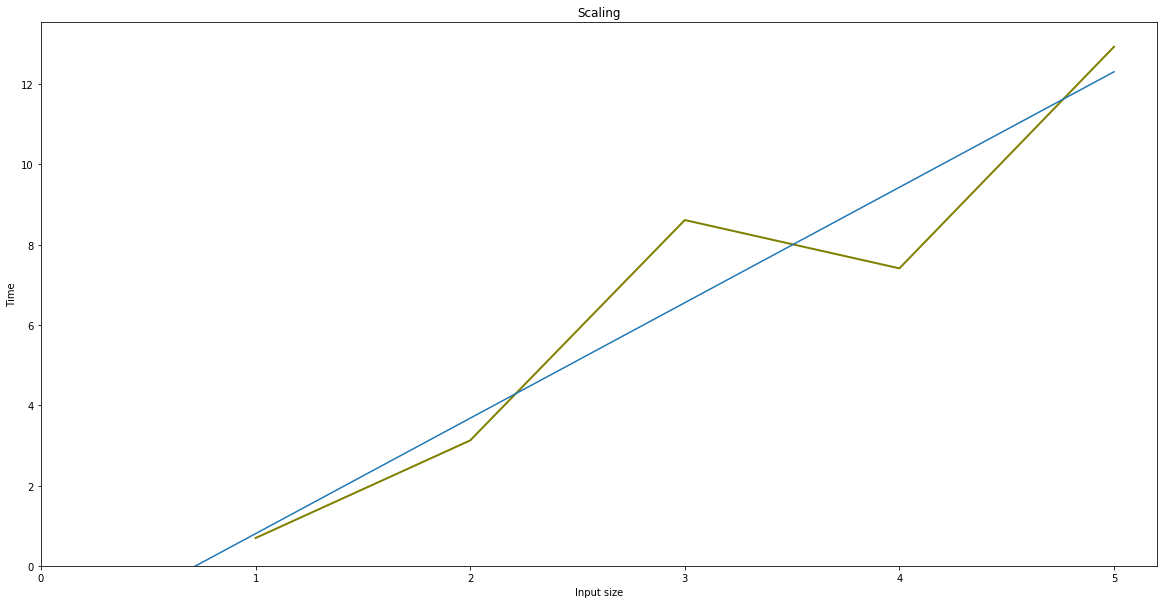

In [149]:
s = sample_fn(5, lambda x: x * (1 + math.log(x)), 1)
plot_series(s)

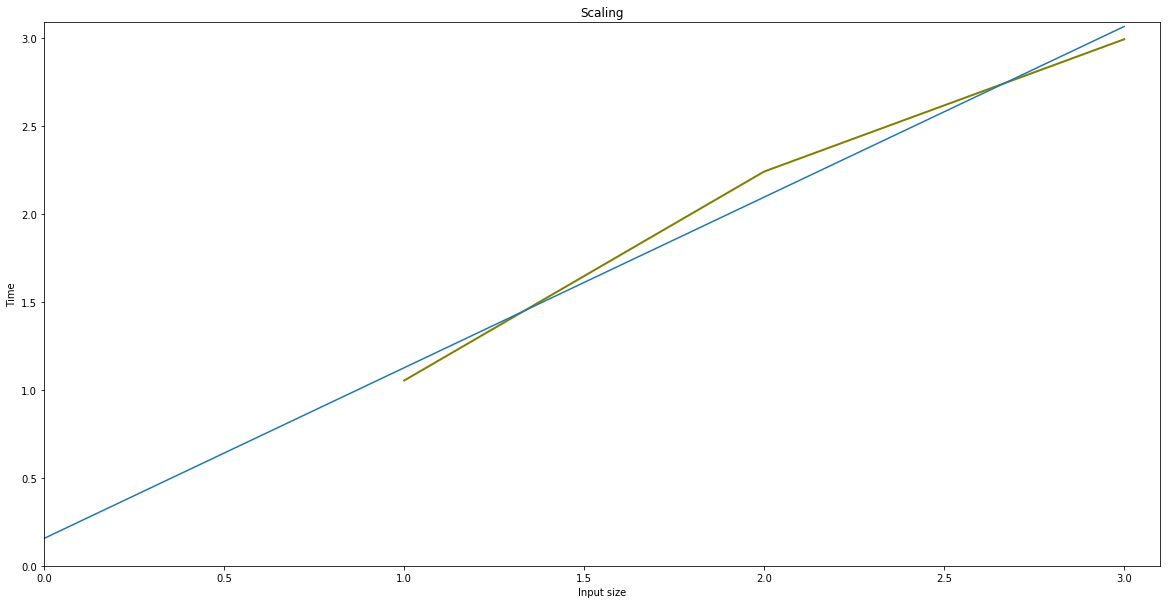

In [156]:
s = sample_fn(3, lambda x: 0.01 + x, 0.2)
plot_series(s)

In [ ]:
def test_fn(growth_fn, sigma_squared):
    